In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pickle
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('Grades.csv')
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [6]:
data.shape

(571, 43)

In [7]:
data.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [8]:
data.head

<bound method NDFrame.head of      Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414

In [9]:
data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [10]:
data['CY-105'] = data['CY-105'].fillna(data['CY-105'].mode()[0])
data['HS-105/12'] = data['HS-105/12'].fillna(data['HS-105/12'].mode()[0])
data['MT-111'] = data['MT-111'].fillna(data['MT-111'].mode()[0])
data['CS-106'] = data['CS-106'].fillna(data['CS-106'].mode()[0])
data['EL-102'] = data['EL-102'].fillna(data['EL-102'].mode()[0])
data['EE-119'] = data['EE-119'].fillna(data['EE-119'].mode()[0])
data['ME-107'] = data['ME-107'].fillna(data['ME-107'].mode()[0])
data['CS-107'] = data['CS-107'].fillna(data['CS-107'].mode()[0])
data['HS-205/20'] = data['HS-205/20'].fillna(data['HS-205/20'].mode()[0])
data['MT-222'] = data['MT-222'].fillna(data['MT-222'].mode()[0])
data['EE-222'] = data['EE-222'].fillna(data['EE-222'].mode()[0])
data['MT-224'] = data['MT-224'].fillna(data['MT-224'].mode()[0])
data['CS-210'] = data['CS-210'].fillna(data['CS-210'].mode()[0])
data['CS-211'] = data['CS-211'].fillna(data['CS-211'].mode()[0])
data['CS-203'] = data['CS-203'].fillna(data['CS-203'].mode()[0])
data['CS-214'] = data['CS-214'].fillna(data['CS-214'].mode()[0])
data['EE-217'] = data['EE-217'].fillna(data['EE-217'].mode()[0])
data['CS-212'] = data['CS-212'].fillna(data['CS-212'].mode()[0])
data['CS-215'] = data['CS-215'].fillna(data['CS-215'].mode()[0])
data['MT-331'] = data['MT-331'].fillna(data['MT-331'].mode()[0])
data['EF-303'] = data['EF-303'].fillna(data['EF-303'].mode()[0])
data['HS-304'] = data['HS-304'].fillna(data['HS-304'].mode()[0])
data['CS-301'] = data['CS-301'].fillna(data['CS-301'].mode()[0])
data['CS-302'] = data['CS-302'].fillna(data['CS-302'].mode()[0])
data['TC-383'] = data['TC-383'].fillna(data['TC-383'].mode()[0])
data['MT-442'] = data['MT-442'].fillna(data['MT-442'].mode()[0])
data['EL-332'] = data['EL-332'].fillna(data['EL-332'].mode()[0])
data['CS-318'] = data['CS-318'].fillna(data['CS-318'].mode()[0])
data['CS-306'] = data['CS-306'].fillna(data['CS-306'].mode()[0])
data['CS-312'] = data['CS-312'].fillna(data['CS-312'].mode()[0])
data['CS-317'] = data['CS-317'].fillna(data['CS-317'].mode()[0])
data['CS-403'] = data['CS-403'].fillna(data['CS-403'].mode()[0])
data['CS-421'] = data['CS-421'].fillna(data['CS-421'].mode()[0])
data['CS-406'] = data['CS-406'].fillna(data['CS-406'].mode()[0])
data['CS-414'] = data['CS-414'].fillna(data['CS-414'].mode()[0])
data['CS-419'] = data['CS-419'].fillna(data['CS-419'].mode()[0])
data['CS-423'] = data['CS-423'].fillna(data['CS-423'].mode()[0])
data['CS-412'] = data['CS-412'].fillna(data['CS-412'].mode()[0])

In [11]:
data = data.drop(columns=['Seat No.'])
data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [12]:
data.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [13]:
grade_mapping = {
    'A+': 4.0, 'A': 3.7, 'A-': 3.5,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D+': 1.5, 'D': 1.0, 'D-': 0.5,  # Lower passing grade with clear distinction
    'F': 0.0,  # Failing grade
    'WU': 0.0,  # Withdrawn Unauthorized
    'W': 0.0,   # Withdrawn
    'I': -1.0,  # Incomplete
}


# Apply the mapping to all grade columns
for column in data.columns[:-1]:  # Exclude 'CGPA' column
    data[column] = data[column].map(grade_mapping)


In [14]:
data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.5,1.7,2.0,1.7,1.5,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.5,3.7,1.7,3.0,3.5,2.205
1,3.7,1.0,1.5,1.0,2.7,2.0,1.0,3.7,1.5,1.0,...,1.5,1.0,2.0,1.0,3.5,2.7,2.0,2.0,3.0,2.008
2,3.7,3.0,3.7,2.7,3.3,3.7,2.7,3.3,3.5,3.5,...,3.0,3.0,3.7,2.0,3.7,3.7,3.7,3.5,3.7,3.608
3,1.0,2.3,1.5,1.0,1.0,3.5,1.5,1.7,1.0,2.3,...,1.5,2.0,1.5,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,3.5,3.5,3.5,3.3,3.7,3.7,3.5,3.3,3.7,3.5,...,2.7,3.3,3.3,2.7,3.5,3.7,3.5,3.5,3.7,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,3.7,3.7,3.5,4.0,3.7,3.5,3.5,4.0,3.3,...,3.5,3.5,3.7,3.7,3.7,3.3,3.3,3.0,3.7,3.798
567,4.0,3.7,3.7,3.7,3.7,3.7,3.7,3.5,3.7,3.7,...,3.3,3.3,3.7,3.7,3.5,3.0,3.5,2.0,3.5,3.772
568,3.0,3.7,3.5,3.3,3.7,3.7,3.7,3.7,3.7,3.0,...,3.5,3.0,3.7,3.3,3.7,2.0,3.3,3.5,3.5,3.470
569,3.7,3.3,1.0,3.7,1.0,1.5,2.7,1.7,2.7,1.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [15]:
data.isna().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

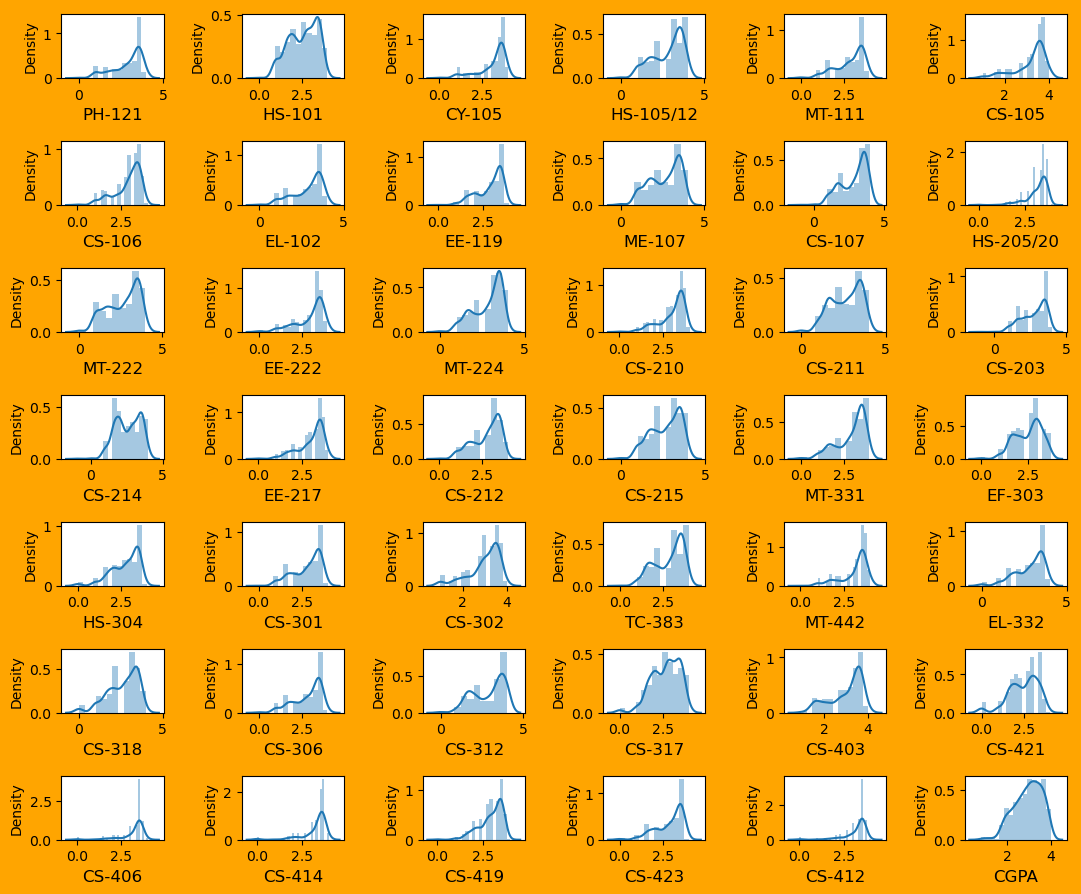

In [16]:
plt.figure(figsize=(11,9),facecolor='orange')
plotnumber=1
for column in data:
    if plotnumber<=42:
        ax=plt.subplot(7,6,plotnumber)   ## Plots the graphs 7 rows and 6 columns at specified axis
        sns.distplot(data[column])    ## Plots a distribution plot of the data 
        plt.xlabel(column,fontsize=12)  
    plotnumber +=1     ## Increments or adds the graphs one by one
plt.tight_layout()

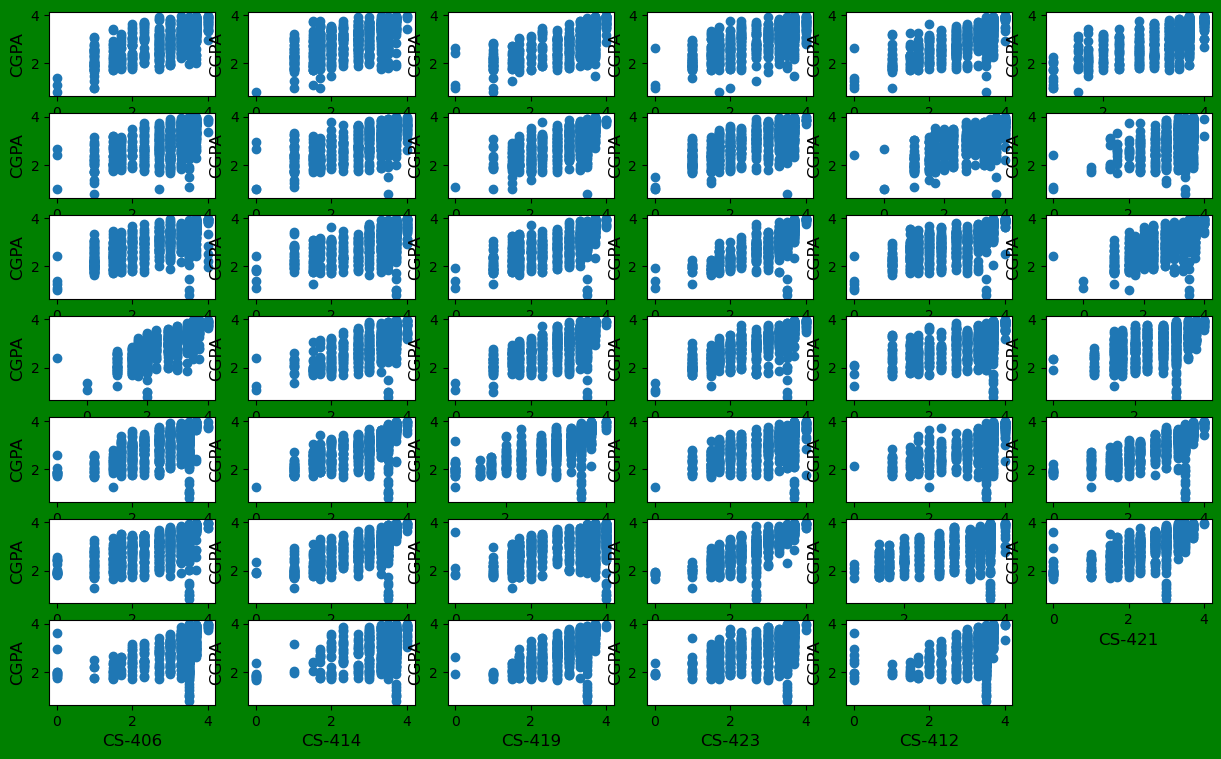

In [17]:
y=data['CGPA']             ## Assigning y as labels
x=data.drop(columns=['CGPA'])   ## By removing Label assigning remaning columns as features

plt.figure(figsize=(15,9),facecolor='green')
plotnumber=1
for column in x:
    if plotnumber <=42:
        ax=plt.subplot(7,6,plotnumber)   ## Specifies the axis to the columns
        plt.scatter(x[column],y)         ## Plots the scatter plot
        plt.xlabel(column , fontsize=12)
        plt.ylabel('CGPA',fontsize=12)
    plotnumber +=1
plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [20]:
x_scaler.shape

(571, 41)

In [21]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['vif']=[variance_inflation_factor(x_scaler,i) for i in range (x_scaler.shape[1])]

In [22]:
vif

,Features,vif
0,PH-121,3.353420
1,HS-101,1.865619
2,CY-105,2.849153
3,HS-105/12,2.624373
4,MT-111,2.972466
5,CS-105,2.705089
6,CS-106,2.257026
7,EL-102,2.094207
8,EE-119,2.524063
9,ME-107,2.374085


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.2, random_state = 42)

In [24]:
y_train.head

<bound method NDFrame.head of 182    3.736
63     3.769
158    3.114
60     2.418
15     2.777
       ...  
71     2.805
106    1.845
270    3.555
435    3.559
102    3.176
Name: CGPA, Length: 456, dtype: float64>

In [25]:
x_scaler.shape

(571, 41)

In [26]:
x_train.shape

(456, 41)

## K-Fold Cross Validation Method

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

x = data.drop(columns=['CGPA']).values  # Features (all columns except CGPA)
y = data['CGPA'].values  # Target (CGPA column)

# Initialize model and KFold
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Lists to store metrics for each fold
mse_scores = []
mae_scores = []
r2_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Predict
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Print average scores across all folds
print(f"Mean MSE: {np.mean(mse_scores):.4f}")
print(f"Mean MAE: {np.mean(mae_scores):.4f}")
print(f"Mean R-squared: {np.mean(r2_scores):.4f}")

Mean MSE: 0.0271
Mean MAE: 0.0859
Mean R-squared: 0.9304


## Hyperparameter Tuning To find the best parameter before training actual model

In [25]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

x = data.drop(columns=['CGPA']).values  # Features (all columns except CGPA)
y = data['CGPA'].values  # Target (CGPA column)

# Define hyperparameter values for tuning
alpha_values = [0.01, 0.1, 1, 10, 100]

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to perform K-fold cross-validation for a given model
def cross_validate_model(model_class, alpha_values, x, y):
    results = {}
    for alpha in alpha_values:
        mse_scores = []
        for train_index, test_index in kf.split(x):
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Train model with current alpha
            model = model_class(alpha=alpha)
            model.fit(x_train, y_train)
            
            # Predict and calculate MSE
            y_pred = model.predict(x_test)
            mse_scores.append(mean_squared_error(y_test, y_pred))
        
        # Store the average MSE for the current alpha
        results[alpha] = np.mean(mse_scores)
    return results

# Cross-validate Ridge Regression
ridge_results = cross_validate_model(Ridge, alpha_values, x, y)
best_ridge_alpha = min(ridge_results, key=ridge_results.get)

# Cross-validate Lasso Regression
lasso_results = cross_validate_model(Lasso, alpha_values, x, y)
best_lasso_alpha = min(lasso_results, key=lasso_results.get)

# Print results
print("Ridge Regression:")
print(f"Best alpha: {best_ridge_alpha}")
print(f"Mean MSE for best alpha: {ridge_results[best_ridge_alpha]:.4f}")

print("\nLasso Regression:")
print(f"Best alpha: {best_lasso_alpha}")
print(f"Mean MSE for best alpha: {lasso_results[best_lasso_alpha]:.4f}")

# Train final models with the best alphas
final_ridge_model = Ridge(alpha=best_ridge_alpha)
final_ridge_model.fit(x_train, y_train)

final_lasso_model = Lasso(alpha=best_lasso_alpha)
final_lasso_model.fit(x_train, y_train)

Ridge Regression:
Best alpha: 100
Mean MSE for best alpha: 0.0255

Lasso Regression:
Best alpha: 0.01
Mean MSE for best alpha: 0.0273


Lasso(alpha=0.01)

In [26]:
final_ridge_model.score(x_test,y_test)

0.8482792559956889

In [27]:
final_lasso_model.score(x_test,y_test)

0.8436242320086854

## Linear Regression Model

In [28]:
model = LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression()

In [30]:
model.score(x_train,y_train)

0.9665115389760199

In [31]:
model.score(x_test,y_test)

0.8528940262455179

In [32]:
y_pred =(model.predict(x_test))
y_pred

array([1.83045453, 3.30848669, 3.39349561, 3.42068136, 2.33873397,
       2.81303784, 2.2145175 , 3.0720597 , 3.07216597, 3.03395924,
       3.03491126, 3.15744982, 2.39114817, 2.91366617, 2.99390998,
       2.727632  , 2.34541957, 1.75945388, 2.28666987, 3.05561164,
       3.20226496, 1.69378243, 2.09619947, 3.01380749, 2.77685846,
       2.73004413, 2.93238286, 1.60999388, 3.60924411, 3.24310739,
       3.47008184, 3.63655812, 3.68203733, 2.87524204, 2.32988279,
       2.63087109, 2.70034637, 2.97597918, 2.41444279, 3.6223006 ,
       2.78151753, 2.08030398, 3.00370535, 1.83854769, 2.48831743,
       3.09851593, 2.78802258, 3.5934126 , 2.73513562, 3.08487242,
       3.76091681, 2.88378249, 3.55437019, 2.35422385, 2.01623552,
       2.23095004, 2.15801189, 2.88334204, 2.96063592, 2.83645858,
       2.908798  , 3.27157187, 3.6854459 , 1.98262089, 2.12523736,
       2.52556902, 2.53310374, 2.53447296, 2.98663575, 2.42253376,
       2.20728139, 3.64398168, 3.75586283, 3.69750563, 2.46646

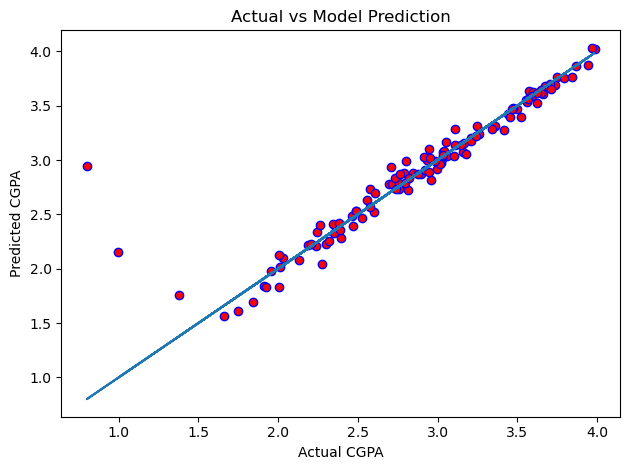

In [33]:
plt.scatter(y_test,y_pred,color='blue',facecolor='red')
plt.plot(y_test,y_test)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual vs Model Prediction')
plt.tight_layout()

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [35]:
y_pred=model.predict(x_test)

In [36]:
mean_absolute_error(y_test,y_pred)

0.09080118457651287

In [37]:
mean_squared_error(y_test,y_pred)

0.05954709349261036

In [38]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.24402273150796908

## K-Fold cross validation for Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x = data.drop(columns=['CGPA']).values  # Features (all columns except CGPA)
y = data['CGPA'].values  # Target (CGPA column)

# Define the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define KFold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics
mse_scores = []
mae_scores = []
r2_scores = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the Decision Tree model
    dt_regressor.fit(x_train, y_train)
    
    # Make predictions
    y_pred = dt_regressor.predict(x_test)
    
    # Calculate evaluation metrics for each fold
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Calculate and display the average of the scores across all folds
print("Cross-Validation Results:")
print(f"Mean Squared Error (MSE): {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
print(f"Mean Absolute Error (MAE): {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"R^2 Score: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

Cross-Validation Results:
Mean Squared Error (MSE): 0.0884 ± 0.0268
Mean Absolute Error (MAE): 0.1951 ± 0.0128
R^2 Score: 0.7593 ± 0.0908


## Hyperparameter Tuning

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assume the dataset has features like 'hours_study', 'attendance', etc., and target 'CGPA'
x = data.drop(columns=['CGPA'])  # Features
y = data['CGPA']                # Target

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate on the test set
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Test Set Mean Squared Error:", mse)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Test Set Mean Squared Error: 0.058024331854899955


In [28]:
from sklearn.model_selection import train_test_split

# Split dataset
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.2, random_state = 42)

## Decision Tree Regressor Model

In [29]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train) 

DecisionTreeRegressor()

In [30]:
model.score(x_train, y_train)

1.0

In [31]:
model.score(x_test, y_test)

0.8481298204318298

In [32]:
x_graph=model.predict(x_test)

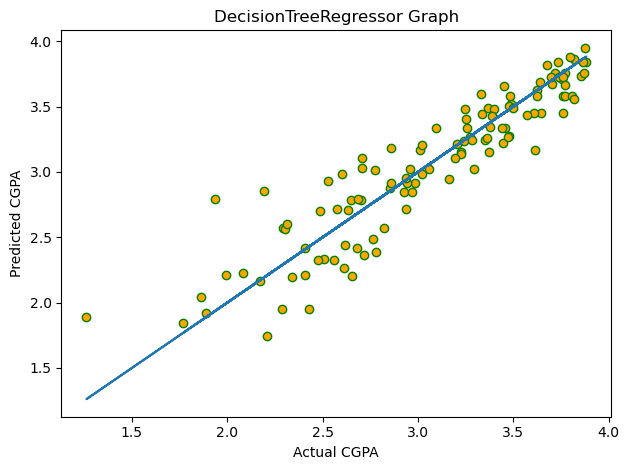

In [33]:
plt.scatter(y_test,x_graph,color='green',facecolor='orange')
plt.plot(y_test,y_test)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('DecisionTreeRegressor Graph')
plt.tight_layout()

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [35]:
mean_absolute_error(y_test,x_graph)

0.16810434782608696

In [36]:
mean_squared_error(y_test,x_graph)

0.0505405043478261

In [37]:
np.sqrt(mean_squared_error(y_test,x_graph))

0.22481215347001615

## K-Fold Cross Validation (Random Forest)

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x = data.drop(columns=['CGPA']).values  # Features (all columns except CGPA)
y = data['CGPA'].values  # Target (CGPA column)

# Define the Decision Tree Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Define KFold cross-validation with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics
mse_scores = []
mae_scores = []
r2_scores = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the Decision Tree model
    rf_regressor.fit(x_train, y_train)
    
    # Make predictions
    y_pred = rf_regressor.predict(x_test)
    
    # Calculate evaluation metrics for each fold
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Calculate and display the average of the scores across all folds
print("Cross-Validation Results:")
print(f"Mean Squared Error (MSE): {np.mean(mse_scores):.4f} ± {np.std(mse_scores):.4f}")
print(f"Mean Absolute Error (MAE): {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
print(f"R^2 Score: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")

Cross-Validation Results:
Mean Squared Error (MSE): 0.0294 ± 0.0148
Mean Absolute Error (MAE): 0.1054 ± 0.0138
R^2 Score: 0.9236 ± 0.0351


## Hyperparameter

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

x = data.drop('CGPA', axis=1).values  # Features
y = data['CGPA'].values

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 150],  # Reduce number of trees
    'max_depth': [10, 20],  # Reduce max depth
    'min_samples_split': [2, 10],  # Fewer split options
    'min_samples_leaf': [1, 5],  # Fewer leaf options
    'max_features': ['log2','sqrt'],  # One option for max_features
    'bootstrap': [True],  # Use only one bootstrap option
    'oob_score': [False],  # Optionally disable oob_score
}

grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available CPU cores
                           verbose=2)  # Print progress during search

grid_search.fit(x_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator (model with the best parameters)
best_rf_model = grid_search.best_estimator_

# Evaluate on test data
test_score = best_rf_model.score(x_test, y_test)
print(f"Test R^2 Score: {test_score}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150, 'oob_score': False}
Test R^2 Score: 0.8800153183644877


## Random Forest Regressor

In [50]:
model2 = RandomForestRegressor()
model2.fit(x_train, y_train)

RandomForestRegressor()

In [51]:
model2.score(x_train,y_train)

0.9904569332782783

In [52]:
model2.score(x_test,y_test)

0.8684944008082911

In [54]:
x_graph=model2.predict(x_test)

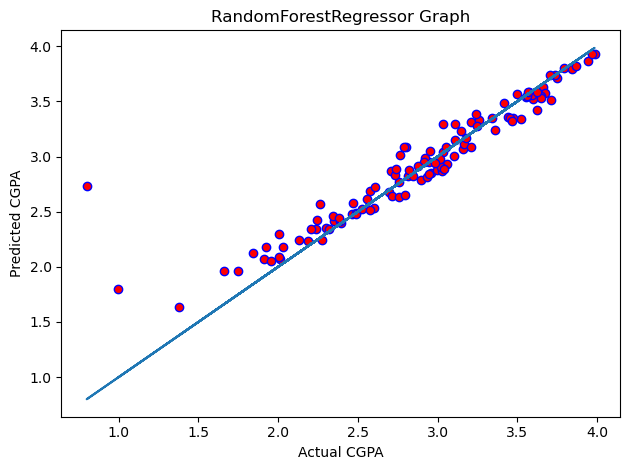

In [55]:
plt.scatter(y_test,x_graph,color='blue',facecolor='red')
plt.plot(y_test,y_test)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('RandomForestRegressor Graph')
plt.tight_layout()

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [57]:
mean_absolute_error(y_test,x_graph)

0.11785921052631586

In [58]:
mean_squared_error(y_test,x_graph)

0.053232210834210564

In [59]:
np.sqrt(mean_squared_error(y_test,x_graph))

0.23072106716598414

## Hence Random Forest Regressor is the best fit Model than other two models